In [12]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
repo_dir = '/home/bruce1996/repo/LIHC_anomaly_detection/'
condition = 'virus'
measurement_output = pd.read_csv(repo_dir + 'data/scRNA-related-data/%s_highly_voted_genes_random_sampling_cluster_result.txt' % condition ,sep='\t',index_col=0)
random_clustering_result = measurement_output.iloc[:100,:]

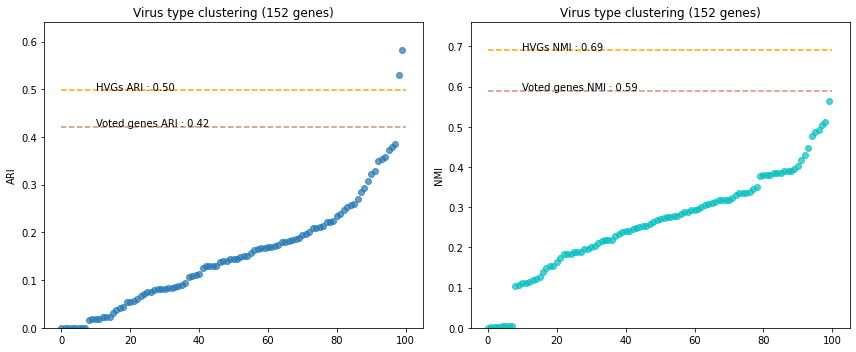

In [16]:
fig,axs = plt.subplots(1,2,figsize = (12,5))
axes = axs.ravel()
title_dict = {'virus' : "Virus type clustering (152 genes)",'patient' : "HCC patient clustering (152 genes)"}

for m_idx,metric in enumerate(['ARI','NMI']) :
    ax = axes[m_idx]
    metric_result = random_clustering_result[metric].values
    random_res = sorted(metric_result)
    x = np.arange(100)
    if metric == 'NMI' :
        ax.scatter(x,random_res,alpha=0.7,c='c')
    else :
        ax.scatter(x,random_res,alpha=0.7)
    ax.hlines(y=measurement_output.loc['Seurat HVGs',metric],xmin=0,xmax=100,linestyles='--',colors='orange')
    ax.hlines(y=measurement_output.loc['Voted genes',metric],xmin=0,xmax=100,linestyles='--',colors='#CD8D7A')
    ax.set_ylabel(metric)
    ax.set_title(title_dict[condition])
    #ax.set_title("Seurat HVGs UMAP + HDBSCAN clustering result")
    ax.set_ylim([random_res[0] * 0.9,max(measurement_output[metric])*1.1])
    ax.text(10,measurement_output.loc['Seurat HVGs',metric],"HVGs %s : %0.2f" % (metric,measurement_output.loc['Seurat HVGs',metric]))
    ax.text(10,measurement_output.loc['Voted genes',metric],"Voted genes %s : %0.2f" % (metric,measurement_output.loc['Voted genes',metric]))
plt.tight_layout()

plt.savefig("/home/bruce1996/repo/LIHC_anomaly_detection/result/scRNA_measurement/highly_voted_genes_random_sampling_cluster_result_%s.pdf" % condition,format='pdf',dpi=300,bbox_inches='tight')
